<a href="https://colab.research.google.com/github/edmundpark99/DATA602-Assignments/blob/main/Edmund_Park_DATA602_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Scraping and Preparation

In [ ]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import numpy as np

In [ ]:
# Scraping the competitor data
x = requests.get('https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html')
print(x.text)

<!doctype html>
<html lang="en">
    <head><script type="text/javascript" src="//web-static.archive.org/_static/js/bundle-playback.js?v=6XRi73ky" charset="utf-8"></script>
<script type="text/javascript" src="//web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script type="text/javascript" src="//web-static.archive.org/_static/js/ruffle.js"></script>
<script type="text/javascript">
  __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html","20201112015618","https://web.archive.org/","web","//web-static.archive.org/_static/",
	      "1605146178");
</script>
<link rel="stylesheet" type="text/css" href="//web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" />
<link rel="stylesheet" type="text/css" href="//web-static.archive.org/_static/css

In [ ]:
page_soup = soup(x.text, "html.parser")

In [ ]:
print(page_soup)

<!DOCTYPE html>

<html lang="en">
<head><script charset="utf-8" src="//web-static.archive.org/_static/js/bundle-playback.js?v=6XRi73ky" type="text/javascript"></script>
<script charset="utf-8" src="//web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script src="//web-static.archive.org/_static/js/ruffle.js" type="text/javascript"></script>
<script type="text/javascript">
  __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html","20201112015618","https://web.archive.org/","web","//web-static.archive.org/_static/",
	      "1605146178");
</script>
<link href="//web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" rel="stylesheet" type="text/css"/>
<link href="//web-static.archive.org/_static/css/iconochive.css?v=qtvMKcIJ" rel="styl

In [ ]:
print(page_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/bundle-playback.js?v=6XRi73ky" type="text/javascript">
  </script>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript">
  </script>
  <script>
   window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};
  </script>
  <script src="//web-static.archive.org/_static/js/ruffle.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html","20201112015618","https://web.archive.org/","web","//web-static.archive.org/_static/",
	      "1605146178");
  </script>
  <link href="//web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" rel="stylesheet" type="text/css"/>
  <link href="//web-static.archive.org/_static/css/ic

In [ ]:
table = page_soup.find("table")
print(table)

<table class="table table-striped table-responsive-md"><thead><tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28+</span></td><td>2003/11/04</td><td><span class="badge badge-region_mag BGD"><a href="/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/region/10486.html">0486</a></span></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-fancybox="" href="/web/20201112015618/https://www.spaceweatherlive.com/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="far fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-outline-dark" href="/web/20201112015618/https://www.spaceweatherlive.com/en/archive/2003/11/04/xray.html">View archive</a></div></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20+</span></td><td>2001/04/02</td><td><span class="badge ba

In [ ]:
table_data = []
rows = table.findAll("tr")
for row in rows:
    row_data = [cell.text.strip() for cell in row.findAll("td")]
    table_data.append(row_data)

In [ ]:
import pandas as pd

columns = ["Rank", "X-Classification", "Date", "Region", "Start Time", "Maximum Time", "End Time", "Movie"]
df1 = pd.DataFrame(table_data, columns=columns)

In [ ]:
print(df1)

    Rank X-Classification        Date Region Start Time Maximum Time End Time  \
0   None             None        None   None       None         None     None   
1      1             X28+  2003/11/04   0486      19:29        19:53    20:06   
2      2             X20+  2001/04/02   9393      21:32        21:51    22:03   
3      3           X17.2+  2003/10/28   0486      09:51        11:10    11:24   
4      4             X17+  2005/09/07   0808      17:17        17:40    18:03   
5      5            X14.4  2001/04/15   9415      13:19        13:50    13:55   
6      6              X10  2003/10/29   0486      20:37        20:49    21:01   
7      7             X9.4  1997/11/06   8100      11:49        11:55    12:01   
8      8             X9.3  2017/09/06   2673      11:53        12:02    12:10   
9      9               X9  2006/12/05   0930      10:18        10:35    10:45   
10    10             X8.3  2003/11/02   0486      17:03        17:25    17:39   
11    11             X8.2  2

In [ ]:
import pandas as pd
import numpy as np

# 1. Drop the last column
df1 = df1.drop("Movie", axis=1)

# 2. Combine the date and time columns into datetime columns
df1["Start DateTime"] = pd.to_datetime(df1["Date"] + " " + df1["Start Time"])
df1["Maximum DateTime"] = pd.to_datetime(df1["Date"] + " " + df1["Maximum Time"])
df1["End DateTime"] = pd.to_datetime(df1["Date"] + " " + df1["End Time"])

# 3. Set regions coded as "-" as missing (NaN)
df1["Region"] = df1["Region"].replace("-", np.nan)

# Print the updated DataFrame
print(df1)

    Rank X-Classification        Date Region Start Time Maximum Time End Time  \
0   None             None        None   None       None         None     None   
1      1             X28+  2003/11/04   0486      19:29        19:53    20:06   
2      2             X20+  2001/04/02   9393      21:32        21:51    22:03   
3      3           X17.2+  2003/10/28   0486      09:51        11:10    11:24   
4      4             X17+  2005/09/07   0808      17:17        17:40    18:03   
5      5            X14.4  2001/04/15   9415      13:19        13:50    13:55   
6      6              X10  2003/10/29   0486      20:37        20:49    21:01   
7      7             X9.4  1997/11/06   8100      11:49        11:55    12:01   
8      8             X9.3  2017/09/06   2673      11:53        12:02    12:10   
9      9               X9  2006/12/05   0930      10:18        10:35    10:45   
10    10             X8.3  2003/11/02   0486      17:03        17:25    17:39   
11    11             X8.2  2

In [ ]:
# Scrape the NASA data
y = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
print(y.text)

<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<br />
<h4 style="padding-bottom=0px">Relevant Publication:</h4>
Gopalswamy, N., M&auml;kel&auml;, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111, <a href="https://doi.org/10.31401/SunGeo.2019.02.03">DOI:10.31401/SunGeo.2019.02.03</a>
<br /><br />
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04

In [ ]:
nasa_soup = soup(y.text, "html.parser")

In [ ]:
print(nasa_soup)

<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<br/>
<h4 style="padding-bottom=0px">Relevant Publication:</h4>
Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111, <a href="https://doi.org/10.31401/SunGeo.2019.02.03">DOI:10.31401/SunGeo.2019.02.03</a>
<br/><br/>
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a

In [ ]:
print(nasa_soup.prettify())

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <br/>
  <h4 style="padding-bottom=0px">
   Relevant Publication:
  </h4>
  Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111,
  <a href="https://doi.org/10.31401/SunGeo.2019.02.03">
   DOI:10.31401/SunGeo.2019.02.03
  </a>
  <br/>
  <br/>
  <pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (

In [ ]:
lines = nasa_soup.get_text().split('\n')

In [ ]:
table_started = False
table_lines = []

for line in lines:
    if "Start" in line:
        table_started = True
    elif table_started and line.strip() == "":
        break
    elif table_started:
        table_lines.append(line)

table_data = '\n'.join(table_lines)

In [ ]:
table_lines = table_data.splitlines()

In [ ]:
table_rows = table_data.split('\n')

data = []

for row in table_rows:
    columns = row.split()
    data.append(columns)

df2 = pd.DataFrame(data)

In [ ]:
print(df2)

                                                    0      1      2      3   \
0                                                  (1)    (2)    (3)    (4)   
1    ==============================================...   None   None   None   
2                                           1997/04/01  14:00  04/01  14:15   
3                                           1997/04/07  14:30  04/07  17:30   
4                                           1997/05/12  05:15  05/14  16:00   
..                                                 ...    ...    ...    ...   
520                                         2017/10/18  05:48  10/18  12:40   
521                                         2019/05/03  23:52  05/04  00:16   
522                                         2020/11/29  13:07  11/29  15:23   
523                                         2020/12/07  16:18  12/08  02:00   
524  ==============================================...   None   None   None   

        4     5        6      7     8      9   ... 

In [ ]:
df2.columns = ['Starting Date', 'Starting Time', 'Ending Date', 'Ending Time', 'Starting Frequency', 'Ending Frequency', 'Solar Source Location', 'NOAA', 'Imp', 'CME Date', 'CME Time', 'CPA', 'CME Width', 'CME Speed', 'PHTX', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']

In [ ]:
print(df2)

                                         Starting Date Starting Time  \
0                                                  (1)           (2)   
1    ==============================================...          None   
2                                           1997/04/01         14:00   
3                                           1997/04/07         14:30   
4                                           1997/05/12         05:15   
..                                                 ...           ...   
520                                         2017/10/18         05:48   
521                                         2019/05/03         23:52   
522                                         2020/11/29         13:07   
523                                         2020/12/07         16:18   
524  ==============================================...          None   

    Ending Date Ending Time Starting Frequency Ending Frequency  \
0           (3)         (4)                (5)              (6)   
1

In [ ]:
df2 = df2.replace('---', float('nan'))

In [ ]:
print(df2)

                                         Starting Date Starting Time  \
0                                                  (1)           (2)   
1    ==============================================...          None   
2                                           1997/04/01         14:00   
3                                           1997/04/07         14:30   
4                                           1997/05/12         05:15   
..                                                 ...           ...   
520                                         2017/10/18         05:48   
521                                         2019/05/03         23:52   
522                                         2020/11/29         13:07   
523                                         2020/12/07         16:18   
524  ==============================================...          None   

    Ending Date Ending Time Starting Frequency Ending Frequency  \
0           (3)         (4)                (5)              (6)   
1

In [ ]:
df2['Halo'] = df2['CPA'].apply(lambda x: x == 'Halo')

df2['CPA'].replace('Halo', float('nan'), inplace=True)

In [ ]:
df2['CNE Width Lower Bound'] = df2['CME Width'].str.contains('/')

df2['CME Width'] = df2['CME Width'].str.replace(r'[^0-9]', '', regex=True)


In [ ]:
df2['Starting Datetime'] = pd.to_datetime(df2['Starting Date'] + ' ' + df2['Starting Time'], errors='coerce')

df2['Ending Datetime'] = pd.to_datetime(df2['Ending Date'] + ' ' + df2['Ending Time'], errors='coerce')
df2['CME Datetime'] = pd.to_datetime(df2['CME Date'] + ' ' + df2['CME Time'], errors='coerce')

In [ ]:
df2 = df2.drop(['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'], axis=1)

In [ ]:
print(df2)

                                         Starting Date Starting Time  \
0                                                  (1)           (2)   
1    ==============================================...          None   
2                                           1997/04/01         14:00   
3                                           1997/04/07         14:30   
4                                           1997/05/12         05:15   
..                                                 ...           ...   
520                                         2017/10/18         05:48   
521                                         2019/05/03         23:52   
522                                         2020/11/29         13:07   
523                                         2020/12/07         16:18   
524  ==============================================...          None   

    Ending Date Ending Time Starting Frequency Ending Frequency  \
0           (3)         (4)                (5)              (6)   
1

# Part 2: Analysis

In [ ]:
import pandas as pd

# Load NASA and SpaceWeatherLive data into DataFrames
nasa_data = df2
swl_data = df1

def custom_sort_key(classification):
    # Extract the numeric part and convert to a float
    match = re.search(r'X(\d+\.\d*|\.\d+|\d+)', classification)
    if match:
        numeric_value = float(match.group(1))  # Group(1) captures the numeric part
        return numeric_value
    return 0.0  # Default value for non-matching strings

# Sort NASA data by classification
nasa_data.sort_values(by='Imp', ascending=False, inplace=True)
nasa_data.reset_index(drop=True, inplace=True)

# Get the top 50 flares from NASA
top_50_nasa_flares = nasa_data.head(50)

# Now, you can compare the top 50 NASA flares with SpaceWeatherLive data.

In [ ]:
print(top_50_nasa_flares)

   Starting Date Starting Time Ending Date Ending Time Starting Frequency  \
0     1997/11/06         12:20       11/07       08:30              14000   
1     2017/09/06         12:05       09/07       08:00              16000   
2     2006/12/05         10:50       12/05       20:00              14000   
3     2017/09/10         16:02       09/11       06:50              16000   
4     2003/11/02         17:30       11/03       01:00              12000   
5     2005/01/20         07:15       01/20       16:30              14000   
6     2011/08/09         08:20       08/09       08:35              16000   
7     2006/12/06         19:00       12/08       24:00              16000   
8     2005/09/09         19:45       09/09       22:00              10000   
9     2000/07/14         10:30       07/15       14:30              14000   
10    2001/04/06         19:35       04/07       01:50              14000   
11    2012/03/07         01:00       03/08       19:00              16000   

In [ ]:
print(df1)

    Rank X-Classification        Date Region Start Time Maximum Time End Time  \
0   None             None        None   None       None         None     None   
1      1             X28+  2003/11/04   0486      19:29        19:53    20:06   
2      2             X20+  2001/04/02   9393      21:32        21:51    22:03   
3      3           X17.2+  2003/10/28   0486      09:51        11:10    11:24   
4      4             X17+  2005/09/07   0808      17:17        17:40    18:03   
5      5            X14.4  2001/04/15   9415      13:19        13:50    13:55   
6      6              X10  2003/10/29   0486      20:37        20:49    21:01   
7      7             X9.4  1997/11/06   8100      11:49        11:55    12:01   
8      8             X9.3  2017/09/06   2673      11:53        12:02    12:10   
9      9               X9  2006/12/05   0930      10:18        10:35    10:45   
10    10             X8.3  2003/11/02   0486      17:03        17:25    17:39   
11    11             X8.2  2

All in all, the NASA data does very well at replicating the SpaceWeather data to a strongly accurate degree. The Top 50 datapoints are all the same solar flares evidently based on classification and other data point aspects.

In [ ]:
import pandas as pd

def find_best_matching_flare(swl_flare, nasa_data):
    # Define a function to determine the matching score between two flares
    def flare_matching_score(swl_flare, nasa_flare):
        # You can define your own criteria for matching here
        # For example, you can compare attributes like classification, date, and flare type
        score = 0
        if swl_flare['X-Classification'] == nasa_flare['Imp']:
            score += 1
        if swl_flare['Start DateTime'] == nasa_flare['Starting Datetime']:
            score += 1
        return score

    best_match = None
    best_score = -1

    # Loop through the NASA data to find the best matching flare
    for index, row in nasa_data.iterrows():
        score = flare_matching_score(swl_flare, row)
        if score > best_score:
            best_score = score
            best_match = row

    return best_match

def integrate_data(df1, df2):
    # Create a new column in df2 to store the rank according to df1
    df2['rank_in_df1'] = None

    # Loop through the top 50 SpaceWeatherLive flares
    for index, row in df1.head(50).iterrows():
        # Find the best matching flare in df2
        best_match = find_best_matching_flare(row, df2)

        # Update the rank_in_df1 column with the rank from df1
        df2.loc[df2.index == best_match.name, 'rank_in_df1'] = index

    return df2

# Example usage
resulting_df2 = integrate_data(df1, df2)


This code uses for loops and ifs to be able to match data between the two dataframes using their respective classification categories and being able to match them according to their rank in the classification.

<ipython-input-49-4dd318701998>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_nasa_flares['CME Width'] = pd.to_numeric(top_50_nasa_flares['CME Width'], errors='coerce')
<ipython-input-49-4dd318701998>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_nasa_flares['CME Width'].fillna(0, inplace=True)


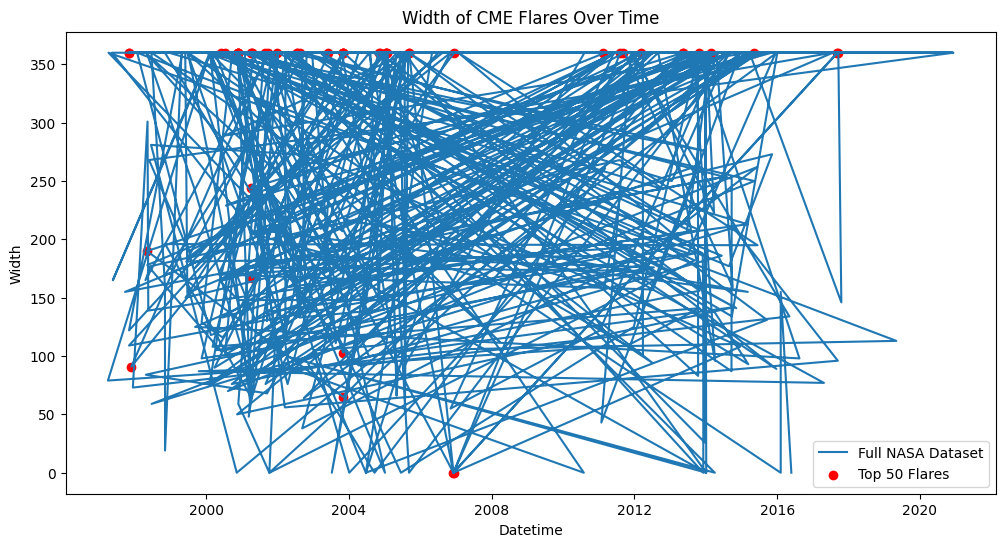

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_top50 and df_full are your dataframes for top 50 and full dataset, respectively

# Handle missing values in 'CME Width' column
nasa_data['CME Width'] = pd.to_numeric(nasa_data['CME Width'], errors='coerce')
nasa_data['CME Width'].fillna(0, inplace=True)

# Handle missing values in 'CME Width' column for top 50 data
top_50_nasa_flares['CME Width'] = pd.to_numeric(top_50_nasa_flares['CME Width'], errors='coerce')
top_50_nasa_flares['CME Width'].fillna(0, inplace=True)

# Now, you can proceed with the plotting code
plt.figure(figsize=(12, 6))
plt.plot(nasa_data['Starting Datetime'], nasa_data['CME Width'], label='Full NASA Dataset')
plt.scatter(top_50_nasa_flares['Starting Datetime'], top_50_nasa_flares['CME Width'], color='red', label='Top 50 Flares')
plt.xlabel('Datetime')
plt.ylabel('Width')
plt.title('Width of CME Flares Over Time')
plt.legend()
plt.show()

The intent of this plot is to be a large scale scatter plot of the width of CME flares over the years based on the Top 50 flares in the dataset. The data is scattered across a large plot showing the Top 50 in particular over the years. The plot shows the rather wide co-variation of the flares.